# Prime Number Visualizer — Ulam Spiral Animation
Features

✔ Generates the Ulam Spiral

✔ Highlights primes

✔ Animates the construction of the spiral

✔ Fully customizable size, colors, speed

✔ Uses only standard libraries + matplotlib + numpy + sympy

## FULL PYTHON CODE (copy + paste)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import isprime

## SETTINGS

In [2]:
N = 101  # grid size (odd number recommended)
interval = 30  # animation speed in ms
prime_color = "yellow"
nonprime_color = "black"


## GENERATE ULAM SPIRAL ORDER

In [3]:
def ulam_spiral_order(n):
    """
    Returns coordinates (x,y) in the order numbers appear
    in the Ulam spiral.
    """
    x = y = 0
    dx, dy = 0, -1
    coords = []
    for i in range(n*n):
        if (-n//2 <= x <= n//2) and (-n//2 <= y <= n//2):
            coords.append((x + n//2, y + n//2))
        # spiral rotation rule
        if (x == y) or (x < 0 and x == -y) or (x > 0 and x == 1-y):
            dx, dy = -dy, dx
        x, y = x + dx, y + dy
    return coords

coords = ulam_spiral_order(N)


## SETUP GRID

In [4]:
grid = np.zeros((N, N))

## Precompute primes up to N*N

In [5]:
prime_flags = [isprime(i) for i in range(1, N*N + 1)]

## PLOTTING SETUP

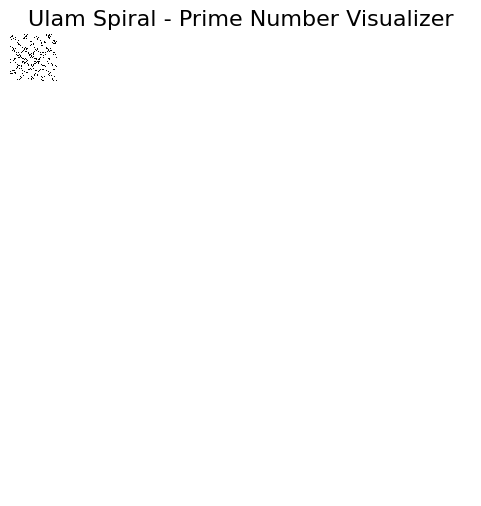

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Ulam Spiral - Prime Number Visualizer", fontsize=16)
ax.axis("off")

img = ax.imshow(
    grid,
    cmap="gray_r",          # pure white primes, black non-primes
    interpolation="none",   # NO smoothing at all
    vmin=0, vmax=1,
)


## ANIMATION FUNCTION

In [13]:
def update(frame):
    x, y = coords[frame]
    if prime_flags[frame]:
        grid[y, x] = 1      # prime → bright
    else:
        grid[y, x] = 0      # nonprime → dark
    img.set_data(grid)
    return [img]

ani = FuncAnimation(
    fig, update, frames=N*N, interval=interval, blit=True
)

plt.show()


## MAKE IT FANCY (Optional Upgrades)
🌈 Colored Spiral (colormap version)

In [14]:
img = ax.imshow(
    grid,
    cmap="inferno",
    interpolation="nearest",
    vmin=0, vmax=1
)


## 💨 Fast static version (for large N like 1001)

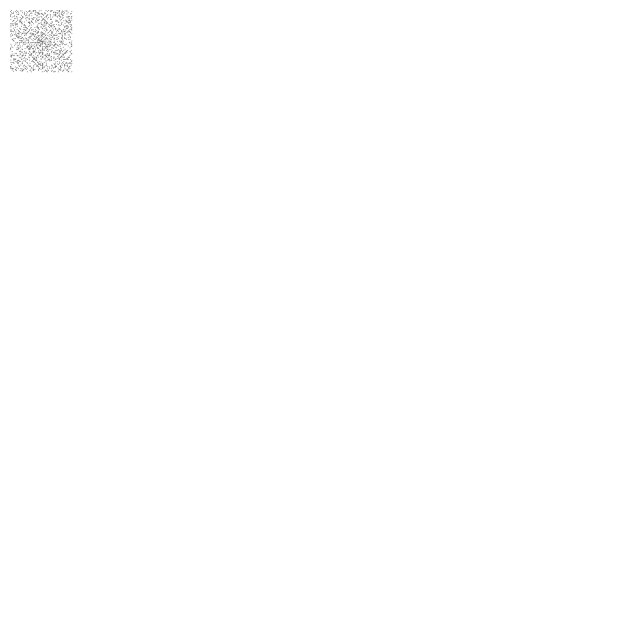

In [15]:
N = 1001
grid = np.zeros((N,N))

for i, (x, y) in enumerate(coords):
    if prime_flags[i]:
        grid[y,x] = 1

plt.figure(figsize=(8,8))
plt.imshow(grid, cmap="binary")
plt.axis("off")
plt.show()
